In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://news.google.com/topstories?hl=zh-TW&gl=TW&ceid=TW:zh-Hant'

res = requests.get(url)

soup = BeautifulSoup(res.text , 'html.parser')

titles = soup.select('.ipQwMb.ekueJc.RD0gLb')
links = soup.select('.VDXfz')

news_title = []
news_link = []

for each_title in titles:
    news_title.append(each_title.text)

for each_link in links:
    news_link.append('https://news.google.com'+each_link['href'].strip('.'))
    
df = pd.DataFrame({'標題':news_title , '內容連結':news_link})
df

,標題,內容連結
0,林秉樞曾跑來見我太太一面 張忠謀： 談什麼不知道,https://news.google.com/articles/CBMi8QFodHRwc...
1,老婆張淑芬見過林秉樞？張忠謀：好像見過一次面,https://news.google.com/articles/CBMiKWh0dHBzO...
2,張忠謀證實林秉樞找過張淑芬！渣男被爆私訊她炒股《蘋果》追查真相是這樣｜ 蘋果新聞網｜ 蘋果日報,https://news.google.com/articles/CBMiR2h0dHBzO...
3,張忠謀赴司法院演講 證實林秉樞與張淑芬見過面,https://news.google.com/articles/CBMiOWh0dHBzO...
4,張忠謀證實：林秉樞與夫人見過1面,https://news.google.com/articles/CBMiqQFodHRwc...
5,台灣添10例境外移入個案 無新增死亡,https://news.google.com/articles/CBMirAFodHRwc...
6,本土+0 境外+10有9例突破感染！陳時中：暫不調整防疫計畫｜ 蘋果新聞網｜ 蘋果日報,https://news.google.com/articles/CBMiQ2h0dHBzO...
7,11月第一週移入29例 近一週暴增64例,https://news.google.com/articles/CBMiL2h0dHBzO...
8,破1個月「加零」！今增10例境外 無死亡個案,https://news.google.com/articles/CBMitgFodHRwc...
9,直播／今本土+0 境外10例、無死亡病例,https://news.google.com/articles/CBMiKWh0dHBzO...


In [2]:
cleaned = []

for article_url in news_link:
    res2 = requests.get(article_url)
    soup2 = BeautifulSoup(res2.text , 'html.parser')
    temp_content = soup2.find_all('p')  ##select()
    for data in temp_content:
        cleaned.append(data.text)

In [3]:
articleAll = '\n'.join(cleaned)

In [14]:
articleAll.replace('\n','').replace(' ','').replace('...Reference#18.dd04d3cb.1638775016.4a47982e','').replace('Reference#18.dd04d3cb.1638775019.4a479cd6','').replace('Reference#18.dd04d3cb.1638775029.4a47abb6','').replace('\xa0','').replace('\r','').replace('ç\x9b®å\x89\x8dè¨\xadå®\x9aç\x9b®å\x89\x8dè¨\xadå®\x9aç\x9b®å\x89\x8dè¨\xadå®\x9aæ°\x91é\x80²é»¨ç«\x8bå§\x94é«\x98å\x98\x89ç\x91\x9cé\x81\xadç\x94·å\x8f\x8bæ\x9e\x97ç§\x89æ¨\x9eæ\x96½æ\x9a´ï¼\x8cå¼\x95ç\x99¼ç¤¾æ\x9c\x83è\xad\x81ç\x84¶ï¼\x8cæ\x9e\x97ç\x94·ç\x94\x9aè\x87³å\x9c¨é\x81\xadå\x88°ç¾\x88æ\x8a¼ç\x9a\x84è·¯ä¸\x8aï¼\x8cä»\x8dè\x83½å°\x8dåª\x92é«\x94å¤§è\x81²å\x85¬é\x96\x8bè«\x87è«\x96æ¡\x88ä»¶ï¼\x8cæ\xad¤è\x88\x89è®\x93è³\x87æ·±åª\x92é«\x94äººé»\x83æ\x9a\x90ç\x80\x9aè³ªç\x96\x91ï¼\x8cå\x89\x8dç¸½çµ±é\x99³æ°´æ\x89\x81é\x81\x8eå\x8e»è¢«ç¾\x88æ\x8a¼å\x89\x8dï¼\x8cé«\x98è\x88\x89é\x9b\x99æ\x89\x8bå\x96\x8aäº\x8612å\x80\x8bå\xad\x97ï¼\x8cè¬\x9bäº\x865ç§\x92é\x90\x98å°±è¢«æª¢è¨\x8eæª¢èª¿å¤±è\x81·ï¼\x8cæ\x9e\x97ç§\x89æ¨\x9eç«\x9fç\x84¶é\x82\x84å\x8f¯ä»¥å\x9c¨è¢«è\x81²æ\x8a¼ç\x9a\x84æ\x99\x82å\x80\x99ç\x99¼è¡¨ä¸\x89å\x88\x86é\x90\x98ç\x9c\x8bæ³\x95ï¼\x8cé\x80£å\x8d¸ä»»å\x85\x83é¦\x96é\x83½ä¸\x8dè¡\x8cç\x9a\x84äº\x8bï¼\x8cæ\x9e\x97ç§\x89æ¨\x9eç«\x9fç\x84¶å\x8f¯ä»¥ã\x80\x82é»\x83æ\x9a\x90ç\x80\x9aè¡¨ç¤ºï¼\x8cæ\x9e\x97ç§\x89æ¨\x9eçµ\x90äº¤æ\x94¿å\x95\x86å\x90\x8dæµ\x81ï¼\x8cäººè\x84\x88é\x97\x9cä¿\x82ç¶¿å¯\x86ã\x80\x82é\x80\x99å\x85©å¤©æ\x9c\x89äººå\x9c¨è¬\x9bï¼\x9aã\x80\x8cæ\x9e\x97ç§\x89æ¨\x9eå°±å\x83\x8fé»\x83ç\x90ªç¿»ç\x89\x88ï¼\x8cå¥½æ\x9c\x83é¨\x99ã\x80\x8dï¼\x8cä½\x86ä»\x96ä¸\x80é»\x9eé\x83½ä¸\x8dèª\x8då\x90\x8cã\x80\x82ä»\x96èª\x8dç\x82ºï¼\x8cé»\x83ç\x90ªæ\x98¯æ\x9c\x83é¨\x99ï¼\x8cä½\x86æ\x9e\x97ç§\x89æ¨\x9eä¸\x8då\x8fªæ\x84\x9bé¨\x99ï¼\x8cæ\x9c\x83é¨\x99ï¼\x8cä¸\x80è·¯é¨\x99ï¼\x8cå¾\x88å¤\x9aé»\x83ç\x90ªæ²\x92æ\x9c\x89ç\x9a\x84ã\x80\x8cé\x97\x9cä¿\x82ã\x80\x8dï¼\x8cä»\x96æ\x98¯æ\x9c\x89ç\x9a\x84ã\x80\x82é»\x83æ\x9a\x90ç\x80\x9aè³ªç\x96\x91ï¼\x8c2015å¹´é\x82\x84å\x9bç\x82ºè·\x9fç\x88¸åª½è¦\x81é\x8c¢ä¸\x8dæ\x88\x90ï¼\x8cé\x97\x9cé\x90µé\x96\x80æ\x89\x93åª½åª½ï¼\x8cé\x82\x84è¦\x81æ¯\x8dè¦ªä¸\x8bè·ªç\x9a\x84æ\x9e\x97ç§\x89æ¨\x9eï¼\x8cç\x8f¾å\x9c¨é\x8a\x80è¡\x8cæ\x88¶é\xadè£¡é\x9d¢ï¼\x8cç\x8f¾é\x87\x91é¤\x98é¡\x8dè¶\x85é\x81\x8e2300è\x90¬ï¼\x9fç\x9f\xadç\x9f\xadäº\x94å¹´ï¼\x8cè²¡å¯\x8cæ\x9a´å¢\x9eï¼\x9fé\x8c¢ï¼\x8cæ\x80\x8eéº¼ä¾\x86ç\x9a\x84ï¼\x9fä»\x96é\x80²ä¸\x80æ\xad¥è³ªç\x96\x91ï¼\x8cå\x96\x9cæ\xad¡çµ\x90äº¤æ\x94¿å\x95\x86å\x90\x8dæµ\x81ï¼\x8cé\x80\x99ä¸\x8dæ\x84\x8få¤\x96ï¼\x8cå¾\x88å¤\x9aäººé\x83½æ\x84\x9bè¹\xadå\x90\x8däººï¼\x8cä½\x86ä½æ\x83³è¹\xadï¼\x8cé\x82\x84å¾\x97ç\x9c\x8bå°\x8dæ\x96¹ï¼\x8cçµ¦ä¸\x8dçµ¦ä½è¹\xadï¼\x9få\x8c\x85æ\x8b¬å°\x8fæ®µã\x80\x81è©¹å®\x8få¿\x97ï¼\x88å\x8f¦å¤\x96é\x82\x84æ\x9c\x89ç¾\x85æ\x96\x87å\x98\x89ã\x80\x81å\x91\x82ç§\x8bé\x81ï¼\x89ç\xad\x89å\x90\x8däººï¼\x8cç\x82ºä»\x80éº¼é\x83½è®\x8aæ\x88\x90æ\x9e\x97ç§\x89æ¨\x9eè\x83½ç\x9b´æ\x8e¥é\x80\x9aè©±ã\x80\x81æ±\x82å\x8a©ã\x80\x81Lineä¾\x86Lineå\x8e»ç\x9a\x84å°\x8dè±¡ï¼\x9fã\x80\x8cæ\x88\x91å°±å\x95\x8fï¼\x8cä¸\x80è\x88¬é¨\x99å\xad\x90ï¼\x8cè\x83½å\x81\x9aå¾\x97å\x88°å\x97\x8eï¼\x9fã\x80\x8dé»\x83æ\x9a\x90ç\x80\x9aèª\x8dç\x82ºï¼\x8cæ\x9e\x97æ\x98¯ä¸\x80è·¯é¨\x99ï¼\x8cä½\x86ä¸\x8då\x8fªé¨\x99ï¼\x8cæ\x98¯ç\x9c\x9fç\x9a\x84æ\x9c\x89ã\x80\x8cé\x97\x9cä¿\x82ã\x80\x8dã\x80\x82é»\x83æ\x9a\x90ç\x80\x9aå\x9b\x9eæ\x86¶ï¼\x8cè¨\x98å¾\x972008å¹´11æ\x9c\x88ï¼\x8cé\x98¿æ\x89\x81å\x9c¨ç\x89¹å\x81µçµ\x84è¢«ä¸\x8aé\x8a¬èµ·è¨´ï¼\x8cè\x81²è«\x8bç¾\x88æ\x8a¼ç\x9a\x84æ\x99\x82å\x80\x99ï¼\x8cé\x98¿æ\x89\x81ä¸\x8aè»\x8aå\x89\x8dï¼\x8cé«\x98è\x88\x89é\x9b\x99æ\x89\x8bï¼\x8cå\x96\x8aäº\x8612å\x80\x8bå\xad\x97ï¼\x9aã\x80\x8cæ\x94¿æ²»è¿«å®³ã\x80\x81å\x8f¸æ³\x95å\x86¤ç\x8d\x84ã\x80\x81å\x8f°ç\x81£å\x8aæ²¹ã\x80\x8dï¼\x81ä¹\x8bå¾\x8cè»\x8aè¼\x9bé\x81\x9eè§£é\x98¿æ\x89\x81å\x88°å\x8c\x97é\x99¢ï¼\x88é\x96\x8båº\xadï¼\x89ï¼\x8cç\x82ºäº\x86ä¸\x8dè®\x93è¨\x98è\x80\x85å\x86\x8dæ¬¡æ\x8e¥è§¸ï¼\x8cé\x82\x84æ\x95\x85æ\x84\x8fèµ°å\x9c°ä¸\x8bè»\x8aé\x81\x93ï¼\x8cé\x97\x9cé\x90µæ\x8d²é\x96\x80ï¼\x8cä¸\x8dçµ¦æ\x8b\x8dã\x80\x82ã\x80\x8cæ\x9e\x97ç§\x89æ¨\x9eä½\x95è¨±äººä¹\x9fï¼\x9fã\x80\x8dé»\x83æ\x9a\x90ç\x80\x9aæ\x84\x9få\x88°ä¸\x8dè§£ï¼\x8cã\x80\x8cå\x89\x8dç¸½çµ±å\x96\x8aå\x80\x8bè©±ï¼\x8cè¬\x9bäº\x86äº\x94ç§\x92é\x90\x98ï¼\x8cæª¢èª¿é\x83½è¦\x81è¢«æª¢è¨\x8eå¤±è\x81·ï¼\x8cæ\x9e\x97ç§\x89æ¨\x9eå±\x85ç\x84¶å\x8f¯ä»¥å\x9c¨è¢«è\x81²æ\x8a¼ç\x9a\x84æ\x99\x82å\x80\x99ï¼\x8cç·©æ\xad¥ç\x99¼è¡¨ç\x9c\x8bæ³\x95ã\x80\x8cä¸\x89å\x88\x86é\x90\x98ã\x80\x8dï¼\x81æ\x98¯èª°çµ¦ä»\x96ç\x9a\x84æ¬\x8aå\x8a\x9bï¼\x9fé\x80£å\x8d¸ä»»å\x85\x83é¦\x96é\x83½ä¸\x8dè¡\x8cç\x9a\x84äº\x8bï¼\x8cæ\x9e\x97ç§\x89æ¨\x9eå±\x85ç\x84¶å\x8f¯ä»¥ï¼\x9fé\x80\x99ä¸\x8då¥\x87æ\x80ªå\x97\x8eï¼\x9fã\x80\x8dé\x97\x9cé\x8dµå\xad\x97ç\x95\x99è¨\x80å\x96\x9cæ\xad¡ä¸\x8då\x96\x9cæ\xad¡è«\x8bä½¿ç\x94¨ã\x80\x90QPPæ\x95¸ä½\x8dè\x83\x8cå\x8c\x85ã\x80\x91APPæ\x8e\x83æ\x8f\x8fQRcodeé\x98å\x8f\x96é©\x97è\xad\x89æ\x9c\x89æ\x95\x88æ\x99\x82é\x96\x93ï¼\x9a120ç§\x92(ç¹¼çº\x8cå\x8d³å\x90\x8cæ\x84\x8få\x80\x8bäººè³\x87æ\x96\x99ä½¿ç\x94¨å\x92\x8cè¨\x8eè«\x96å\x8d\x80ç®¡ç\x90\x86è¦\x8fç«)è¨ªå®¢æ¨¡å¼\x8få\x83\x85é\x99\x90ç\x95\x99è¨\x80å\x8a\x9fè\x83½è«\x8bä½¿ç\x94¨ã\x80\x90QPPæ\x95¸ä½\x8dè\x83\x8cå\x8c\x85ã\x80\x91APP(ç¹¼çº\x8cå\x8d³å\x90\x8cæ\x84\x8få\x80\x8bäººè³\x87æ\x96\x99ä½¿ç\x94¨å\x92\x8cè¨\x8eè«\x96å\x8d\x80ç®¡ç\x90\x86è¦\x8fç«)è¨ªå®¢æ¨¡å¼\x8få\x83\x85é\x99\x90ç\x95\x99è¨\x80å\x8a\x9fè\x83½ä¸\x8bè¼\x89ã\x80\x90QPPæ\x95¸ä½\x8dè\x83\x8cå\x8c\x85ã\x80\x91å»ºè\xad°ä½¿ç\x94¨Safariç\x80\x8fè¦½å\x99¨é\x96\x8bå\x95\x9fé\x81é\x9d¢å»ºè\xad°ä½¿ç\x94¨Chromeç\x80\x8fè¦½å\x99¨é\x96\x8bå\x95\x9fé\x81é\x9d¢è«\x8bå\x85\x88é\x81¸æ\x93\x87é\xadå\x83\x8fï¼\x8cé«\x94é©\x97è¨ªå®¢æ¨¡å¼\x8fè¨ªå®¢é\x88ç\x9f¥è¨ªå®¢å¸³è\x99\x9fç\x82ºä¸\x80æ¬¡æ\x80§å¸³è\x99\x9fï¼\x8cä¸»è¦\x81æ\x8f\x90ä¾\x9bä½¿ç\x94¨è\x80\x85é«\x94é©\x97ç\x95\x99è¨\x80å\x8a\x9fè\x83½ï¼\x8cã\x80\x90å\x88\x87æ\x8f\x9bè£\x9dç½®/ä½¿ç\x94¨ç\x84¡ç\x97\x95è¦\x96çª\x97/æ¸\x85é\x99¤cookieå\x89\x87ç\x84¡æ³\x95ä½¿ç\x94¨å\x8e\x9fæ\x9c\x89è¨ªå®¢èº«å\x88\x86ã\x80\x91ï¼\x8cè\x8b¥æ\x83³é\x80²ä¸\x80æ\xad¥äº\x86è§£æ\x88\x91å\x80\x91ï¼\x8cæ\xad¡è¿\x8eä½¿ç\x94¨è\x80\x85é\x80£çµ\x90QPPå¸³è\x99\x9fï¼\x8cè\x88\x87æ\x88\x91å\x80\x91ä¸\x80å\x90\x8cæ\x88\x90ç\x82ºå\x84ªç§\x80ç\x9a\x84è©±é¡\x8cè¨\x8eè«\x96è\x80\x85ï¼\x81å¦\x82å¯©æ\x9f¥ç\x82ºä¸\x8då¯¦æª¢è\x88\x89ï¼\x8cå\x89\x87æª¢è\x88\x89äººæ\x9c\x83è¢«å\x81\x9cæ¬\x8aã\x80\x82','')

'民進黨立委高嘉瑜遭男友林秉樞施暴，媒體報導，林秉樞與台積電創辦人張忠謀夫人張淑芬也有「炒股票的截圖」。張忠謀今天表示，林秉樞曾跑來見他太太一面，但談什麼他不知道。司法院下午在3樓大禮堂舉辦首場「趨勢講堂」，邀請台積電創辦人張忠謀先生演講，分享「珍惜台灣半導體晶圓製造的優勢」，許宗力院長到場致詞。張忠謀到司法院接受聯訪時，做上述表示。聯合報日前報導，男子馬文鈺爆料，林秉樞對外炫耀，自己跟台積電創辦人張忠謀夫人張淑芬對話炒股票的截圖。張淑芬則透過幕僚表示，和林秉樞只有在一個公益的場合有一面之緣，對方提案談公益，交由基金會評估，事後並沒有進一步合作。媒體詢問是否認識林秉樞，張忠謀表示，「他（林秉樞）跑過來見我太太一面」。媒體再問林秉樞是否討論股票的問題，張忠謀回答：「我不知道」。高嘉瑜男友施暴新北警待命有訊息均回報檢方無指示詹宏志請辭國策顧問藍營：坐實政商施壓段宜康被馬文鈺「狂電」後神隱徐巧芯批大甩鍋林秉樞人脈全靠裝熟蔡易餘：我沒鳥他柯文哲要政院查網軍蘇貞昌：任何不法都該嚴辦為提高疫苗施打率與中央疫情規範，近日多間全聯啟動作為疫苗接種站，台北市長柯文哲6日表示，「對於要不要將全聯（賣場）開疫苗注射站，個人持反對態度。」認為這樣可能會出現醫療需求來不及的情況。民進黨立委高嘉瑜受暴案爆發後，施暴的林秉樞的背景也遭起底，在林母的告別式上，不僅許多政治人物到場，還有許多政商名流都有送花，引發社會關注，對此，資深媒體人王時齊披露，台積電之所以會送花是因為林秉樞之前在一場活動上，曾和台積電創辦人張忠謀的夫人張淑芬合照，所以台積電禮貌性送花；王認為，林秉樞應該也是自己去要花的。[周刊王CTWANT]立委高嘉瑜遭男友林秉樞施暴案外案，網路媒體「CTWANT」報導，林秉樞身為一個43歲博士班學生，永豐銀行帳戶可用餘額竟超過2300萬元，質疑這些錢與操弄網軍有關。前桃園市議員王浩宇今（6日）在臉書發文表示，林秉樞父母是教職退休，存幾千萬給孩子剛好而已，反問「2300萬很多嗎」？王浩宇指出，林秉樞的父親是退休校長、母親是退休老師，工作一輩子收入穩定，退休沒有終身俸嗎？2300萬很多嗎？在板橋美國首席防疫專家佛奇（AnthonyFauci）5日表示，新冠肺炎變異株Omicron嚴重性的早期跡象「有些令人振奮」，嚴重性看起來沒有那麼高，不過也警告仍然需要更多資訊。民進黨立委高嘉瑜遭男友林秉樞家暴

In [15]:
%pip install jieba

Note: you may need to restart the kernel to use updated packages.


In [16]:
import jieba
jieba.load_userdict('dict.txt.big')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\angus\AppData\Local\Temp\jieba.cache
Loading model cost 1.552 seconds.
Prefix dict has been built successfully.


In [57]:
Sentence = jieba.cut(articleAll, cut_all=True)
#print('全模式'+": "  + "/ ".join(Sentence) + '\n')  #把句子中所有可以成詞的詞語都掃描出來，速度非常快，但是不能解決歧義。

# test_list = ['A', 'B', 'C']
# print('-'.join(test_list)) # A-B-C

Sentence = jieba.cut(articleAll, cut_all=False)
#print('精確模式'+": " + "/ ".join(Sentence)+ '\n')  #試圖將句子最精確地切開，適合文本分析。
 
Sentence = jieba.cut_for_search(articleAll)  
#print('搜索引擎模式'+": " + "/ ".join(Sentence)+ '\n') #在精確模式的基礎上，對長詞再次切分，提高召回率，適合用於搜尋引擎分詞。

#可以三個模式都跑看看，拿捏一下準確度

In [17]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

stopwords = {}.fromkeys(['也', '日', '月', '人', '在', '是', '的', '4', '5', '，', '、', ',', '!', '2', '3',
                        '2021', '12', '2', '「', '」', '(', ')', '！', '（', '）', '。', '/', '／', '?','æ','è','ç','å','ä','é',''])

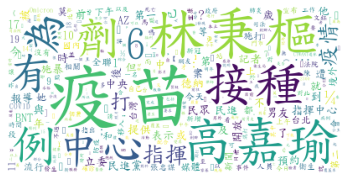

<Figure size 54000x54000 with 0 Axes>

In [20]:
Sentence = jieba.cut_for_search(articleAll)

hash = {}

for item in Sentence:
    
    if item in stopwords:  #將不要的字詞排除在雲之外
        continue
        
    if item in hash:
        hash[item] = hash[item] + 1
    else:
        hash[item] = 1
        
wc = WordCloud(font_path = "TW-Kai-98_1.ttf" ,   #設置字體
               background_color = "white" ,   #背景顏色
               max_words = 2000 ,   #文字雲顯示最大辭數
               stopwords = stopwords)  #停用字辭

#使用dictionary的內容產生文字雲
wc.generate_from_frequencies(hash)

#視覺化呈現
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(50,50) , dpi = 1080)
plt.show()
wc.to_file('output.png')